In [1]:
import numpy as np
import pandas as pd
import os
for dirname, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [4]:
gen_1=pd.read_csv("C:/Users/prapt/Downloads/archive (1)/Plant_1_Generation_Data.csv")
gen_1.drop('PLANT_ID',axis=1,inplace=True)
sens_1= pd.read_csv("C:/Users/prapt/Downloads/archive (1)/Plant_1_Weather_Sensor_Data.csv")
sens_1.drop('PLANT_ID',axis=1,inplace=True)

#format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

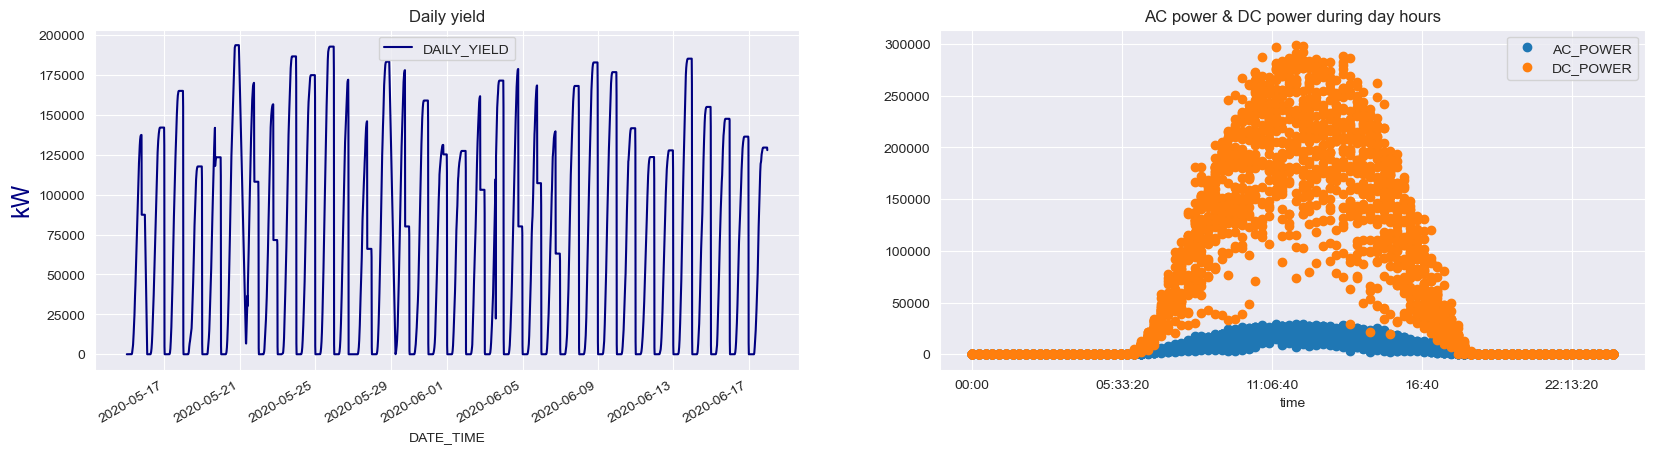

In [6]:
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])
# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME',axis=1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

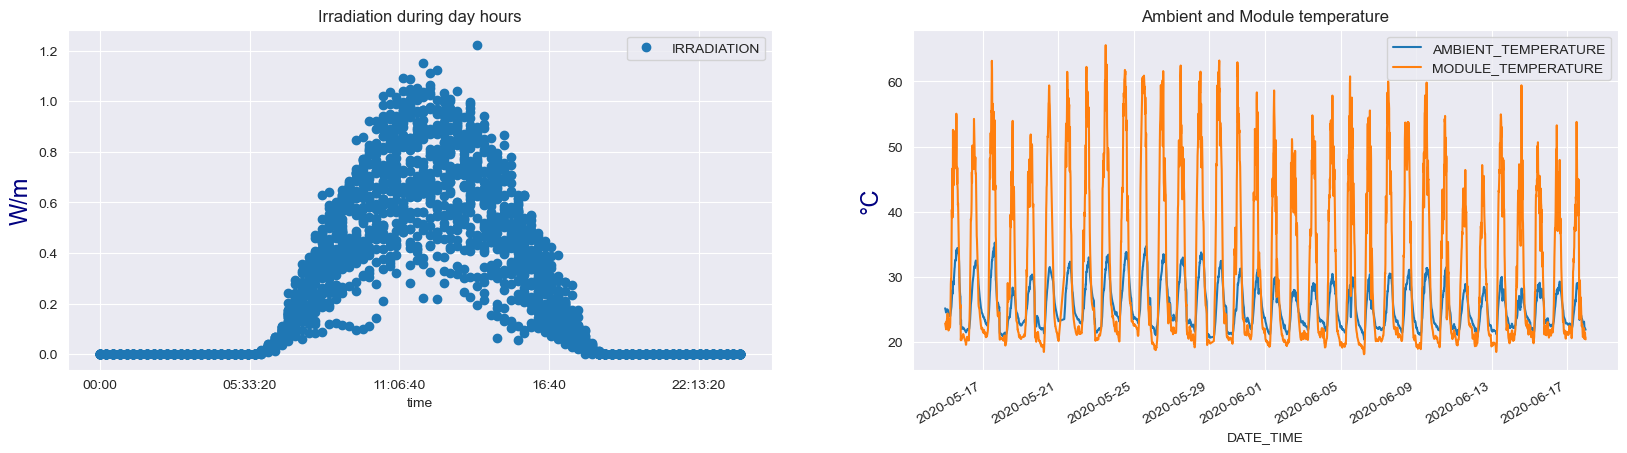

In [9]:
df_sens=sens_1.groupby('DATE_TIME').sum().reset_index()
df_sens['time']=df_sens['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_sens.plot(x='time',y='IRRADIATION',ax=ax[0],style='o')
# AC & DC power plot
df_sens.set_index('DATE_TIME').drop('time',axis=1)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(ax=ax[1])

ax[0].set_title('Irradiation during day hours',)
ax[1].set_title('Ambient and Module temperature')
ax[0].set_ylabel('W/m',color='navy',fontsize=17)
ax[1].set_ylabel('°C',color='navy',fontsize=17)
plt.show()

In [12]:
temp1_gen=gen_1.copy()

temp1_gen['time']=temp1_gen['DATE_TIME'].dt.time
temp1_gen['day']=temp1_gen['DATE_TIME'].dt.date


temp1_sens=sens_1.copy()

temp1_sens['time']=temp1_sens['DATE_TIME'].dt.time
temp1_sens['day']=temp1_sens['DATE_TIME'].dt.date

# just for columns
cols=temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack()

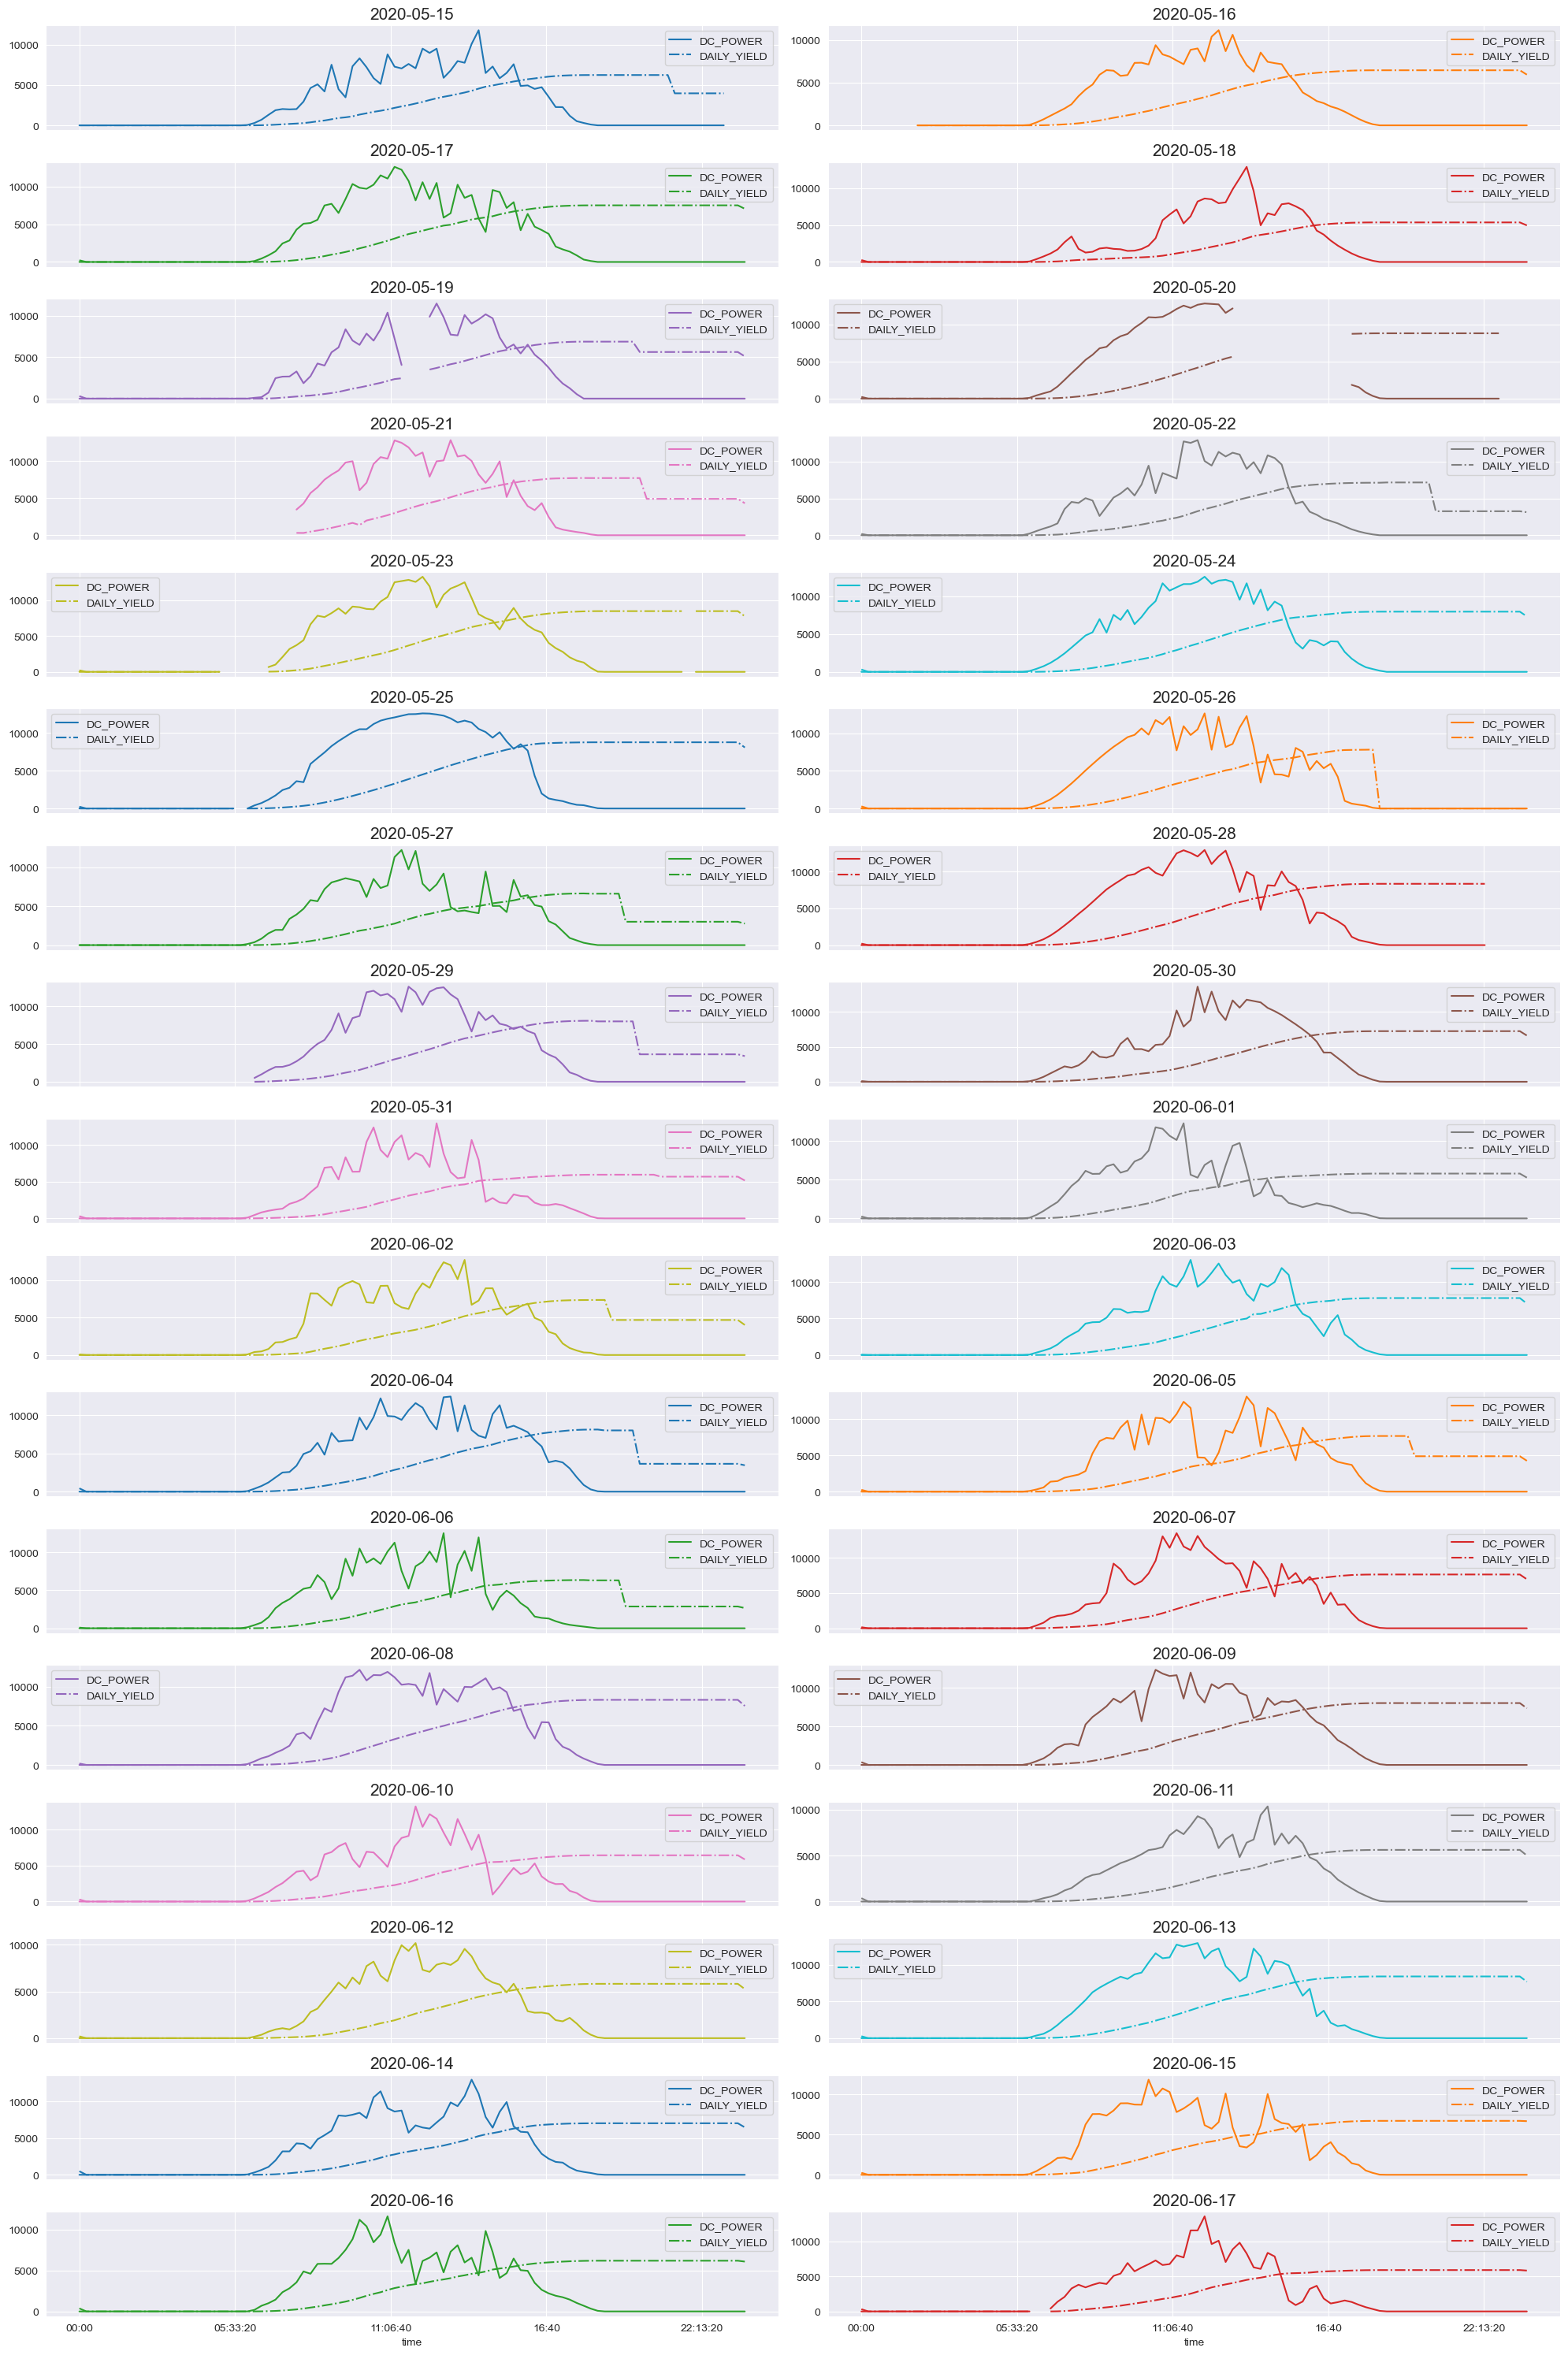

In [13]:
ax =temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
temp1_gen.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

In [15]:
from pandas.tseries.offsets import DateOffset
! pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 220.2 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/614.7 kB 245.8 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/614.7 kB 365.7 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 365.7 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 365.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/614.7 kB 229.7 kB/s eta 0:00:03
   -------- ----------------------------- 133.1/614.7 kB 342.3 kB/s eta 0:00:02
   ------------------ ------------------- 297.0/614.7 kB 656.1 kB/s eta 0:00:01
   ------------------------------ ------- 491.5/614.7 kB 994.4 kB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 1.1 MB

In [16]:
pred_gen=gen_1.copy()
pred_gen=pred_gen.groupby('DATE_TIME').sum()
pred_gen=pred_gen['DAILY_YIELD'][-288:].reset_index()
pred_gen.set_index('DATE_TIME',inplace=True)
pred_gen.head()

,DAILY_YIELD
DATE_TIME,
2020-06-14 23:30:00,155054.000000
2020-06-14 23:45:00,142682.392857
2020-06-15 00:00:00,5480.000000
2020-06-15 00:15:00,0.000000
2020-06-15 00:30:00,0.000000


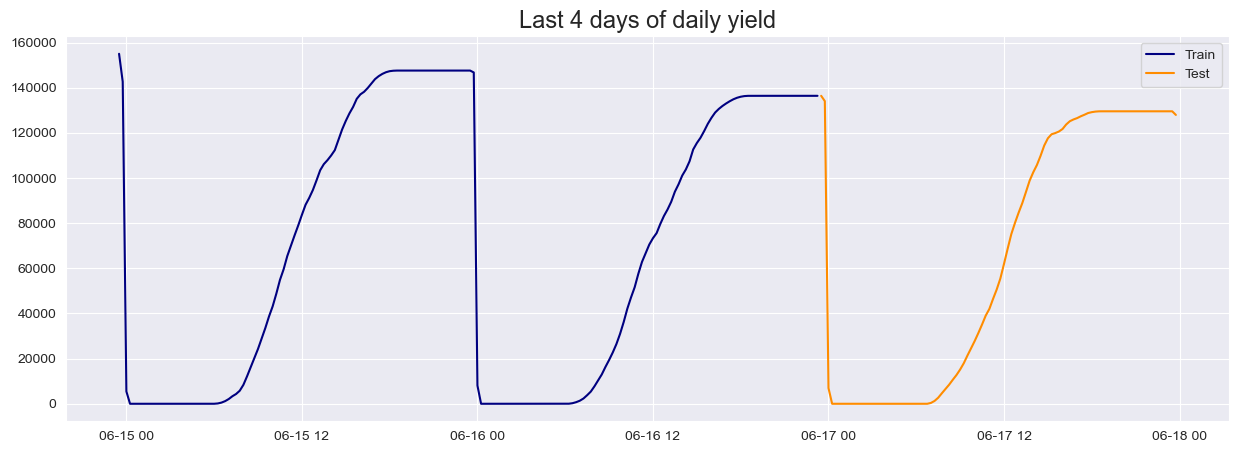

In [17]:
train=pred_gen[:192]
test=pred_gen[-96:]
plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()